In [1]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

In [2]:
data_filename ="ad.data"

In [3]:
def convert_number(x):
    try:
        return float(x)
    except ValueError:
        return np.nan

In [4]:
converters = {}
for i in range(1558):
    converters[i] = convert_number

In [5]:
converters[1558] = lambda x:1 if x.strip() == "ad." else 0

In [6]:
ads = pd.read_csv(data_filename, header = None, converters = converters)

In [7]:
ads.head()

,0,1,2,3,4,5,6,7,8,9,...,1549,1550,1551,1552,1553,1554,1555,1556,1557,1558
0,125.0,125.0,1.0000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,57.0,468.0,8.2105,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,33.0,230.0,6.9696,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,60.0,468.0,7.8000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,60.0,468.0,7.8000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [8]:
ads.dropna(inplace=True)
X = ads.drop(1558, axis = 1).values
y = ads[1558]

In [9]:
from sklearn.decomposition import PCA

In [10]:
pca =PCA(n_components = 5)
Xd = pca.fit_transform(X)

In [11]:
np.set_printoptions(precision = 3, suppress = True)
pca.explained_variance_ratio_

array([ 0.854,  0.145,  0.001,  0.   ,  0.   ])

In [12]:
clf = DecisionTreeClassifier(random_state = 14)
scores_reduced = cross_val_score(clf, Xd, y , scoring = 'accuracy')

/Users/Claire/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


In [13]:
print("PCA score: {:.3f}".format(scores_reduced.mean()))

PCA score: 0.933


In [21]:
%matplotlib inline
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [10, 7]

In [19]:
classes = set(y)
colors = ['red','green']

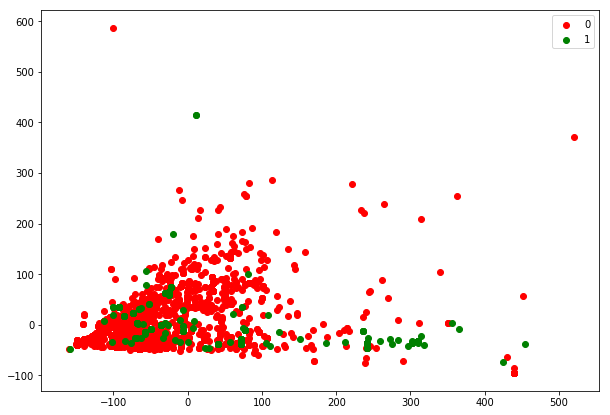

In [22]:
for cur_class, color in zip(classes, colors):
    mask = (y== cur_class)
    plt.scatter(Xd[mask,0],Xd[mask,1],marker= 'o',color =color, label = int(cur_class))
plt.legend()
plt.show()